In [ ]:
# data prep for supple fig 12 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib import ticker
from matplotlib import font_manager

# Load data
file_path = "CATH_cntA_cntB_testtype_pval_padjusted_direction_log2FC_-log10p-adj_nNovelPair_meannDomain_cathname_abundanceinCATH-significant_isCATHtop100.tsv"
df = pd.read_csv(file_path, sep="\t")

# Drop first row if it's a duplicated header
df = df.iloc[1:].copy()

# Convert relevant columns to numeric
numeric_cols = ["p_adjusted", "log2FC", "abundanceinCATH"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaNs in critical columns
df.dropna(subset=["p_adjusted", "log2FC", "abundanceinCATH"], inplace=True)

# Compute log10(abundanceinCATH) for binning
df["log10_abundanceinCATH"] = np.log10(df["abundanceinCATH"].clip(lower=1e-10))

# Quantile-based binning
df["quantile_bin"] = pd.qcut(df["log10_abundanceinCATH"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Extract significant data
significant_df = df[df["p_adjusted"] < 0.05].copy()

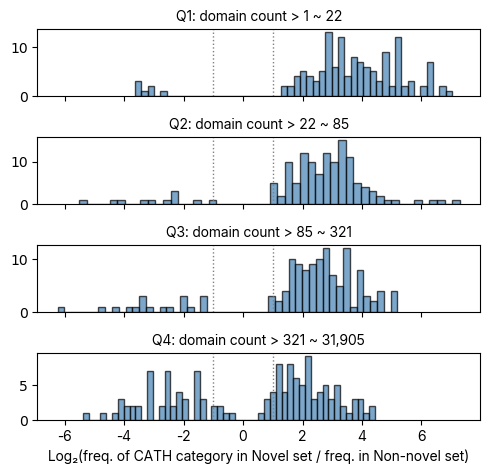

In [63]:
# supple fig 12(a)  

# inter_font 설정 (인터 폰트를 경로에서 불러오거나 이미 설정되어 있다면 사용)
inter_font = font_manager.FontProperties(fname="Inter_18pt-Regular.ttf")  # 실제 폰트 경로로 변경 필요

# Plotting: Histogram of log2FC per abundance quantile
fig, axs = plt.subplots(4, 1, figsize=(5, 5), sharex=True)

axs = axs.flatten()
quantile_labels = ["Q1", "Q2", "Q3", "Q4"]
custom_titles = [
    "Q1: domain count > 1 ~ 22",
    "Q2: domain count > 22 ~ 85",
    "Q3: domain count > 85 ~ 321",
    "Q4: domain count > 321 ~ 31,905",
]

# 원하는 x축 틱 위치
xticks = [-6, -4, -2, 0, 2, 4, 6]

for i, label in enumerate(quantile_labels):
    ax = axs[i]
    sub_df = df[df["quantile_bin"] == label]

    ax.hist(sub_df["log2FC"], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(x=-1, linestyle="dotted", color="gray", linewidth=1)
    ax.axvline(x=1, linestyle="dotted", color="gray", linewidth=1)
    ax.set_title(custom_titles[i], fontsize=10, fontproperties=inter_font)
    ax.set_xticks(xticks)
    ax.tick_params(axis='x', labelsize=8)
    ax.set_xticklabels(xticks, fontproperties=inter_font)

# 마지막 subplot에만 xlabel 추가
axs[-1].set_xlabel("Log₂(freq. of CATH category in Novel set / freq. in Non-novel set)", fontproperties=inter_font)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("bargraph.svg", format="svg")
plt.show()


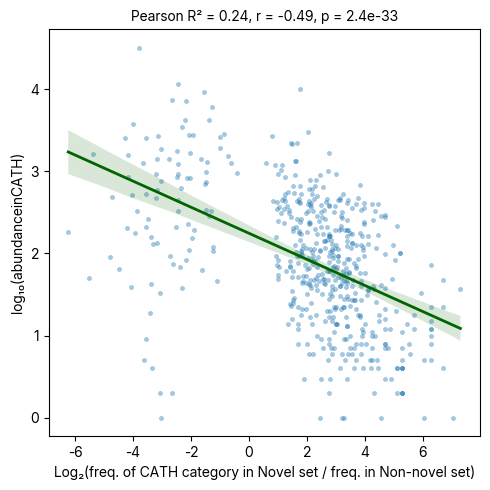

In [ ]:
# supple fig 12(b)
import seaborn as sns
from matplotlib import font_manager
from matplotlib import ticker
from scipy.stats import spearmanr

# inter_font 설정 (경로 맞게 수정 필요하거나 시스템에 설치되어 있다면 family="Inter")
inter_font = font_manager.FontProperties(fname="Inter_18pt-Regular.ttf") 

# Compute Pearson correlation
from scipy.stats import pearsonr
pearson_corr, pearson_pval = pearsonr(df["log10_abundanceinCATH"], df["log2FC"])
r_squared = pearson_corr ** 2

# Plot
plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=df,
    x="log2FC",
    y="log10_abundanceinCATH",
    alpha=0.4,
    edgecolor=None,
    s=10
)
sns.regplot(
    data=df,
    x="log2FC",
    y="log10_abundanceinCATH",
    scatter=False,
    color="darkgreen",
    line_kws={"linewidth": 2}
)

# Title with font
plt.title(
    f"Pearson R² = {r_squared:.2f}, r = {pearson_corr:.2f}, p = {pearson_pval:.1e}",
    fontsize=10,
    fontproperties=inter_font
)

# Label with font
plt.xlabel("Log₂(freq. of CATH category in Novel set / freq. in Non-novel set)", fontproperties=inter_font)
plt.ylabel("log₁₀(abundanceinCATH)", fontproperties=inter_font)

# Fix x-ticks
xticks = [-6, -4, -2, 0, 2, 4, 6]
plt.xticks(ticks=xticks, labels=xticks, fontproperties=inter_font)
plt.yticks(fontproperties=inter_font)

plt.tight_layout()
plt.savefig("log2FC_vs_log10abundance_Pearson.svg", format="svg")
plt.show()
